# A matter of bias

We have now seen one source of error in our machine learning model: randomness in the data.  This is what we learned so far:

1. We saw that it is impossible to perfectly predict our future outcomes, because of randomness in our outcomes - thus irreducible error.
2. We saw that training on random data leads to our model matching some of that randomness -- which causes error due to overfitting.
3. We saw that we can correct for overfitting by training on the training set, and scoring our model on the test set.

Now let's look at another thing that can go wrong with our model: our model is too simplistic.  That is, when we train our model, we do not include some of the features that influence our outcomes.  We'll see that this introduces another source of error called **bias**.

### It's complicated

Imagine that we once again work for a restaurant that tracks both the temperature and the amount of customers each day.  We see the following data.

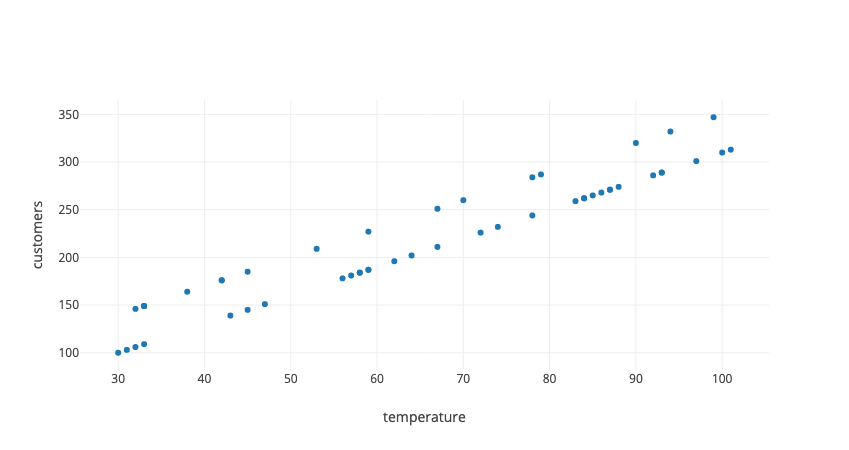

In [21]:
from graph import plot, trace_values, build_layout
from data import temps, customers
trace_1 = dict(x = temps, y =  customers, mode = 'markers', name = 'data') 
layout = {'yaxis': {'title': 'customers'}, 'xaxis': {'title': 'temperature'}}
plot([trace_1], layout = layout)

Now as you can see, the plot suggests that the number of customers *is* influenced by temperature.  When the temperature increases, the amount of customers tends to increase.  But it's not in a straight line anymore.  The amount of customers appears to jump up at times.

If the only feature we include to explain these jumps is `temperature`, then this variation is unaccounted for.  After all, it doesn't appear that this variation is random, and temperature does not perfectly explain these variations.

The jumps in the data are caused by the weekend.  But when we're modeling the data, we may not know that.  So if we construct a model where only `temperature` as a feature, we will be *underfitting*.  

> Underfitting occurs when our model does not include all of the relevant features that cause variation in our outcomes in the data.

Let's see what happens when our model suffers from underfitting.

### Building a machine learning model

To see what happens in an underfit model, we'll model with temperature as our only feature used to predict customers as our target.  We won't include a feature about whether it's a weekend.

In [4]:
from sklearn.linear_model import LinearRegression

input_temps = list(map(lambda temperature: [temperature], temps))
biased_model = LinearRegression()
biased_model.fit(input_temps,customers)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Then we can plot the predictions for each of our temperatures.

In [5]:
biased_customer_predictions = biased_model.predict(input_temps)

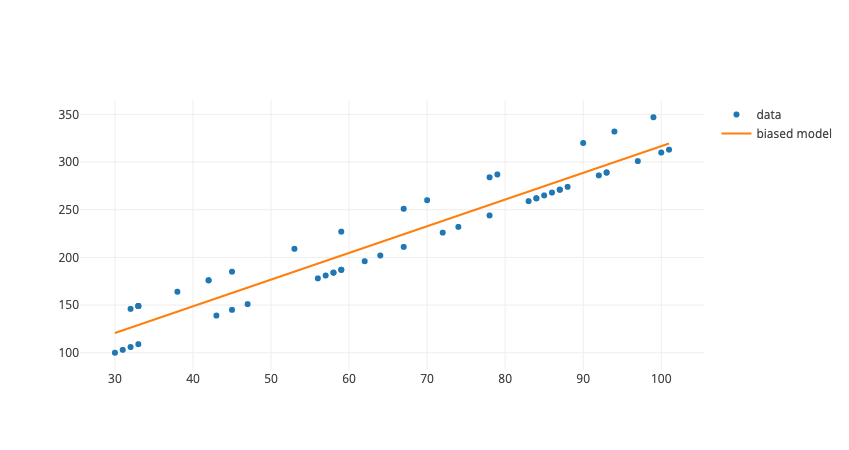

In [24]:
from graph import plot, trace_values, build_layout
model_trace = trace_values(temps, biased_customer_predictions, mode = 'lines', name = 'biased model')
plot([trace_1, model_trace])

So essentially we have a line that falls in between a good amount of the datapoints.  If we look at the model that produced this line, we see the following:

In [7]:
biased_model.coef_

array([2.79995472])

In [8]:
biased_model.intercept_

36.69096288927369

$$ customers=2.80∗temperature+36.69 $$

And if we look at the score related to this model, we get the following:

In [199]:
biased_model.score(input_temps, customers)

0.9206741954934545

So not bad, but not perfect.

### Introducing another parameter

Let's move away from our underfit model by introducing another parameter.  We'll add a list of feature variables that tracks a different feature: `is_weekends`.  An element in `is_weekends` is a 0 when it represents a day that is not a weekend and a 1 when true. 

In [12]:
is_weekends = [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,0, 0, 0, 0,
0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0]

> We generated a pseudo-random list like this with the `choices` function in Python.

We can build our model with both `temperatures` and `is_weekends` as variables simply by zipping together our data.

In [13]:
independent_vars = list(zip(temps, is_weekends))
independent_vars[0:3]

[(30, 0), (31, 0), (32, 1)]

As we know, each tuple represents a row of data, with the first element capturing the temperature and the second element capturing the `is_weekend` feature.

Now, we fit our model with both of these features, and get the following score.

In [16]:
updated_model = LinearRegression()
updated_model.fit(independent_vars, customers)
updated_model.score(independent_vars, customers)

0.972872430622018

So we have improved from the score of `.9206` in the previous model. These are our parameters.

In [17]:
updated_model.coef_

array([ 2.96222873, 32.44745646])

> The first is related to temperature and the second is related to `is_weekends`.  Because is_weekend can only be 1 or 0, this is saying that the model expects 32 more customers when it's a weekend, all things being equal.

This is our intercept.

In [19]:
updated_model.intercept_

15.039616483780549

We can write our `updated_model` as the following.

$$ customers = 2.96*temp + 32.45*is\_weekend + 15.04$$

And then we can plot the predictions like so.

In [27]:
updated_predictions = updated_model.predict(independent_vars)

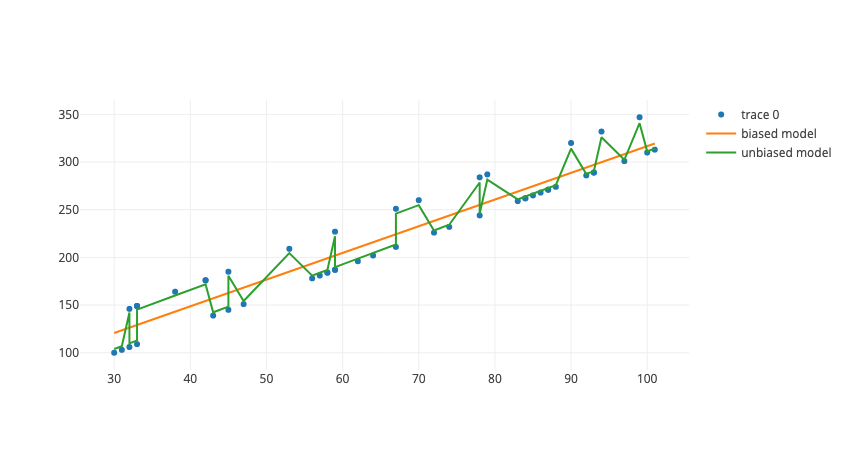

In [29]:
from graph import plot, trace_values, build_layout

updated_model_trace = trace_values(temps, updated_predictions, mode = 'lines', name = 'unbiased model')
plot([trace_1, model_trace, updated_model_trace])

So we can see that by including the extra parameter, we have a model that jumps up 32 each time that it sees the `is_weekend` feature set to 1.  Our earlier model only changed when the temperature changed, so would not change and had no knowledge of whether it was a weekend.

This is a normal phenomenon when creating machine learning models.  Our models become more flexible the more features that we include in the model.  

So with only one feature of `temperature` 
 * our model is a straight line.  
 
With two features of `temperature` and `is_weekend` 
* our model is flexible enough to captures the variations in customers.

When we have a model that is simpler than the underlying model that produced the data our model has error due to bias.  

### Comparing bias with variance

### It gets harder

As you can see, with both of the parameters included our error has been greatly reduced.  It may be unclear why we would ever not include a relevant parameter.  It could be because we simply do not have the data needed to include the parameter.  For example, if we did not information to tell us if it was a weekend, we wouldn't what's accounting for our error.  

And, as we'll see, things get tricky when we encounter random error along with bias.  But we'll leave that for another lesson.

### Summary

In this lesson, we were introduced to a new source of error: bias.  Error due to bias occurs when our estimated machine learning model does not include features that contribute to variations in the dependent variable.  We can make our model unbiased by including the appropriate feature, and feeding that into the training data for our machine learning model, as we did when we include data related to `is_weekends`.  In this lesson, we happened to know the underlying feature, but in general it may not be so easy to figure out what underlying factor is not accounted for, or we may simply not have the data to feed it into the machine learning model.